In [1]:
!pip install tokenization

In [2]:
!pip install keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tokenization
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from keras.utils import to_categorical

In [4]:
from nltk.corpus import stopwords
import nltk

stop_words = stopwords.words('english')
ps = nltk.stem.PorterStemmer()

def preprocess(document):
    
    #Parsing, to allow the extaraction of data so it can be used
    with open(document, 'r') as file:
        content = file.read()
    
    # Tokenization
    tokens = nltk.word_tokenize(content)

    # Remove punctuation and convert to lowercase
    tokens_pun_lower = [w.lower() for w in tokens if w.isalnum()]

    # Remove stop words
    tokens_stop = [w for w in tokens_pun_lower if w not in stop_words]

    # Stemming
    terms = [ps.stem(w) for w in tokens_stop]
    
    #turn into string again
    return " ".join(terms)

In [5]:
import os
Data = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        
        doc_type = filename.split('_')[0].lower()
        content = preprocess(os.path.join(dirname, filename))
        
        Data.append([content, doc_type])

news = pd.DataFrame (Data, columns = ['Contents', 'Type'])
news

Contents      Type
0    articl mjliu liu write bad luck got vd call gr...   medical
1    cut hicnet medic newslett page 13 volum 6 numb...   medical
2    hope correct newsgroup scoop methanol futur al...   medical
3    articl slagl write anyon enlighten relationshi...   medical
4    articl icbal write might look allergi doctor a...   medical
..                                                 ...       ...
295  us interest rate rise expect us interest rate ...  business
296  hous price drop sale slow hous price fell nove...  business
297  uk economi face uk manufactur sector continu f...  business
298  industri reviv hope japan japanes industri gro...  business
299  peugeot deal boost mitsubishi struggl japanes ...  business

[300 rows x 2 columns]

In [6]:
#to show the types of documents, without .unique it would display all 300 types, this only shows the type once regardles of its actual count. 
classesList = news['Type'].unique()
classesList

array(['medical', 'food', 'business'], dtype=object)

In [7]:
#one hot encoding to allow machine learning to occur
news['Type'] = pd.factorize(news['Type'])[0]
news

Contents  Type
0    articl mjliu liu write bad luck got vd call gr...     0
1    cut hicnet medic newslett page 13 volum 6 numb...     0
2    hope correct newsgroup scoop methanol futur al...     0
3    articl slagl write anyon enlighten relationshi...     0
4    articl icbal write might look allergi doctor a...     0
..                                                 ...   ...
295  us interest rate rise expect us interest rate ...     2
296  hous price drop sale slow hous price fell nove...     2
297  uk economi face uk manufactur sector continu f...     2
298  industri reviv hope japan japanes industri gro...     2
299  peugeot deal boost mitsubishi struggl japanes ...     2

[300 rows x 2 columns]

In [8]:
X = news['Contents']
y = news['Type']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 42)

In [10]:
#TF-IDF vectorizer to convert text data to numerical to allow machine learning
vector = TfidfVectorizer()

In [11]:
#fit and transform
X_train_vec = vector.fit_transform(X_train)

In [12]:
#transform
X_test_vec = vector.transform(X_test)

In [13]:
df = DecisionTreeClassifier(random_state=42)

In [14]:
#train
df.fit(X_train_vec, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
#predict
y_pred = df.predict(X_test_vec)

In [16]:
#evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9333333333333333


In [17]:
#evaluation
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Sqaured Error: {mse}")

Mean Sqaured Error: 0.10666666666666667


In [18]:
#classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       0.95      0.87      0.91        23
           2       0.96      0.92      0.94        25

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



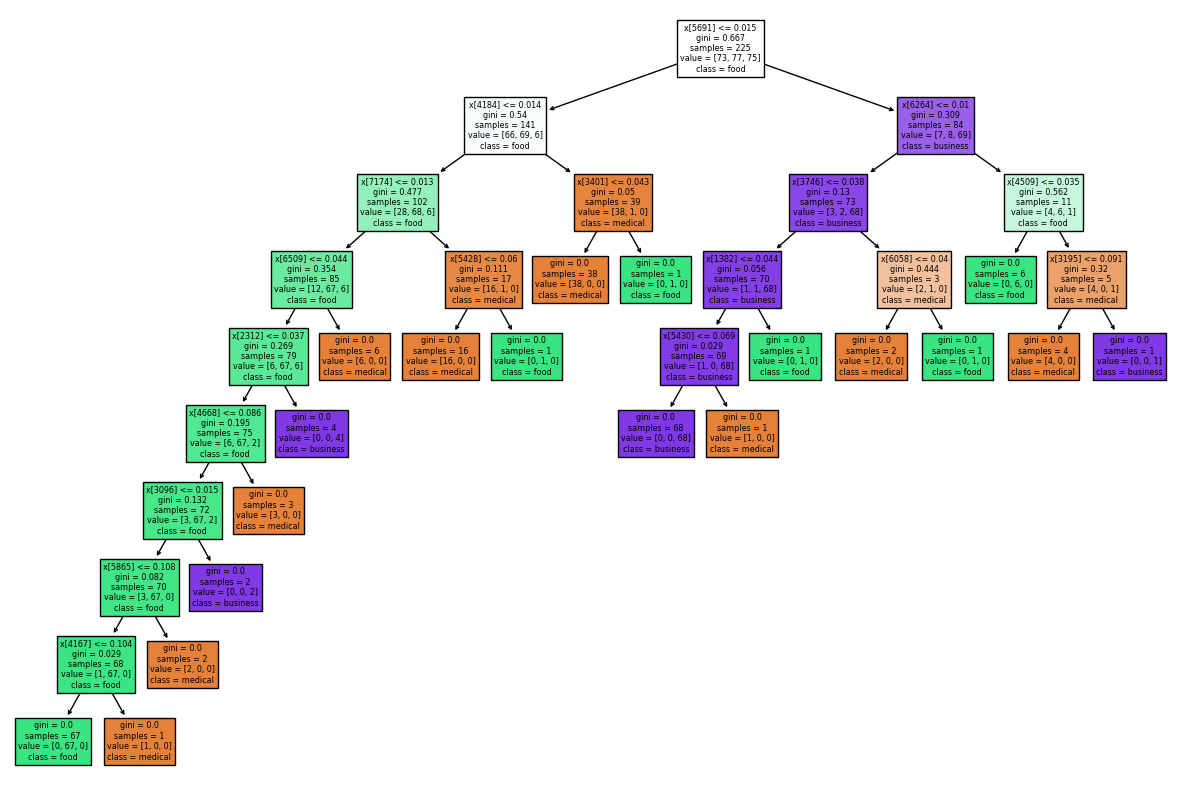

In [19]:
#viz on how it reaches its decision
from sklearn.tree import plot_tree

# Plot decision tree
plt.figure(figsize=(15, 10))
plot_tree(df, filled=True, feature_names=None, class_names=classesList)
plt.show()

In [20]:
stop_words_2 = set(stopwords.words('english'))
ps_2 = nltk.stem.PorterStemmer()

def preprocess_real_data(raw_data):
    # Assuming if string
    
    # Tokenization
    tokens_2 = nltk.word_tokenize(raw_data)

    # Remove punctuation and convert to lowercase
    tokens_pun_lower_2 = [w.lower() for w in tokens_2 if w.isalnum()]

    # Remove stop words
    tokens_stop_2 = [w for w in tokens_pun_lower_2 if w not in stop_words]

    # Stemming
    terms_2 = [ps_2.stem(w) for w in tokens_stop_2]
    
    # Turn into string again
    processed_data = " ".join(terms_2)
    
    return processed_data

In [21]:
#using real world data to test the algorithm to see it predict
raw_real = """There is no denying the fact that stress can have a profound effect on a person’s overall health. According to the State of the Global Workplace 2023 Report, about 44% of workers around the globe say they experience a lot of stress.

Previous research shows that ongoing stress can lead to high blood pressureTrusted Source and an increase in cardiovascular events. It can also negatively impact the immune systemTrusted Source, affect metabolic healthTrusted Source, and impact sleep qualityTrusted Source.

Because stress can be so damaging to our bodies, it is no wonder why people look for different ways to alleviate it.

One method many people on social media platforms are using and promoting is taking supplements of the herb ashwagandha.

Called “glizzy pills,” influencers using the hashtag #ashwagandha are reporting benefits including boosted testosterone, increased libido, improved brain function, and feeling so happy, confident, and stress-free that they can better deal with unhappy events like a break-up or removing toxic people from their lives.

Could these claims be true or are they misleading? Are there potential risks of taking ashwagandha that people need to know about? And are there other ways people can relieve stress without taking a supplement?

Medical News Today spoke with seven medical experts to get the answers to these questions and find out the truth behind social media’s ashwagandha claims."""


real_world_data = preprocess_real_data(raw_real)

# Use the same vectorizer to transform the real-world data
X_real_world = vector.transform([real_world_data])

# Make predictions
predictions = df.predict(X_real_world)

# Find the index of the maximum value in the predictions array
result = np.argmax(predictions)

# Map the index to the corresponding type label
dict1 = {0: "Medical", 1: "Food", 2: "Business"}
predicted_type = dict1[result]

print(f"The type is: {predicted_type}")

The type is: Medical


In [22]:
#using LIME for XAI
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

In [23]:
pipeline = make_pipeline(vector, df)
class_names = ['Medical', 'Food', 'Business']
explainer = LimeTextExplainer(class_names=class_names)

In [24]:
#showing what words makes it predicat the type
ind = 6
text = X_test[ind]
print(text)

exp = explainer.explain_instance(text, pipeline.predict_proba, num_features=6)
exp.show_in_notebook(text=True)

betti harvey write research medic person amaz ca find scientif known fact automat assum reaction psycholog mind boggl simpli state result bankrupt ethic healthcar scientif medicin industri america fed massiv wast fraud cost us 15 gnp support industri deliv margin health care commun unfortun clinton plan whatev form take probabl cost us even greater sum bleah steve


In [25]:
#showing what words makes it predicat the type
ind = 295
text = X_test[ind]
print(text)

exp = explainer.explain_instance(text, pipeline.predict_proba, num_features=6)
exp.show_in_notebook(text=True)

us interest rate rise expect us interest rate expect rise fifth time sinc june follow us feder reserv latest meet later tuesday borrow cost tip rise quarter percentag point move come recoveri us economi world biggest show sign robust sustain dollar declin meanwhil spook market along high oil price rais concern pace inflat see evid inflat move higher said ken kim analyst stone mccarthi research risk actual happen mr kim ad borrow cost could rise fed said move measur way combat price growth lift interest rate low prompt sluggish us global growth econom pictur look rosi fed implement quarter percentag point rise june august septemb novemb although us economi grew annual rate three month septemb analyst warn fed care move aggress take wind recoveri sail earlier month figur show job creation still weak consum confid subdu think fed feel fair amount flexibl said david berson chief economist fanni mae inflat move move lot econom growth subsid fed would feel flexibl paus tighten econom growth 

In [26]:
#showing what words makes it predicat the type
ind = 148
text = X_test[ind]
print(text)

exp = explainer.explain_instance(text, pipeline.predict_proba, num_features=6)
exp.show_in_notebook(text=True)

everyon true food allergi symptom govern ige convers peopl food intoler like lactos intoler get digest symptom listen dismiss sever gi issu genuin pain eat dairi shellfish egg might best avoid allergist count peopl food allergi count american academi allergi asthma immunolog note kind food intoler caus enzym defici sensit particular chemic food natur otherwis allergi rather must invok immun system
